# Song Recomender Model

### Notes:
1. numerical variables. (can do research and find which features are relevant for model)
2. scale
3. train k means (+pickle)

- create model

user input
- search for track id
- get audio features
- scale
- predict cluster
- recommend random song cluster

X
X-noid = X.drop("ID")

kmeans.labels
x["cluster"] = kmeans.labels



Tip. Go through whole process first and get quick and dirty model.



to train model only use numerical values
can potentially drop some numerical features to improve model(recommended) (research)


### Which feature to use
For a K-means model that recommends songs based on user input, focusing on Spotify audio features that capture the essence of a song's mood, energy, and danceability can be particularly effective. Consider these features:

Danceability: Reflects the suitability of a song for dancing, based on tempo, rhythm stability, beat strength, and overall regularity.
Energy: Measures intensity and activity, capturing the dynamic feel of a song.
Valence: Indicates the musical positiveness conveyed by a track, which can help in understanding the emotional context.
Tempo: The speed or pace of a song, which is fundamental in matching songs with a similar vibe.
Acousticness: Helps in distinguishing between acoustic and more electronic/synthetic music.
Instrumentalness: Useful for identifying songs with a focus on instrumentation, which might be preferred by users interested in instrumental tracks.
Liveness: Could be considered if the presence of live audience sounds or a "live" feel is important for similarity.
Speechiness: Can be useful to filter out tracks with more spoken words, distinguishing between music tracks and those with significant vocal content like podcasts or audiobooks.
These features collectively can capture the essence of what a user might enjoy in a song, beyond just genre or artist. By clustering songs using these features, your K-means model can identify and recommend songs that share similar characteristics with the user's input song, potentially leading to more personalized and satisfying recommendations.

Remember, the choice of features might require iteration; you might start with these and adjust based on the performance of your recommendation system and user feedback.

## To do
- increase number of clusters. approx 20'000 song so should have a lot of klusters

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Dataset preparation

In [2]:
song_database_df = pd.read_csv('../data/full_af.csv',index_col=0)
song_database_df = song_database_df.drop(columns = ["mode", "key", "duration_ms", "liveness"])

In [3]:
#getting only numeric features for model
song_database_numeric_noid_df = song_database_df.select_dtypes(include=['number'])

In [4]:
#getting df with numeric features plus id
song_database_numeric_id_df = pd.concat([song_database_df["id"],song_database_numeric_noid_df], axis = 1)

## Scaling features

In [5]:
X = song_database_numeric_noid_df
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature
0,0.382,0.451,-6.606,0.0293,0.5570,0.000034,0.506,150.803,4
1,0.742,0.375,-13.829,0.0482,0.3970,0.901000,0.105,102.023,4
2,0.585,0.552,-10.613,0.0353,0.1940,0.017100,0.496,100.089,4
3,0.405,0.535,-7.504,0.0531,0.0531,0.106000,0.637,97.698,4
4,0.586,0.526,-6.928,0.0564,0.5550,0.000000,0.456,107.153,4
...,...,...,...,...,...,...,...,...,...
19463,0.431,0.628,-6.259,0.0384,0.4030,0.000008,0.277,118.016,4
19464,0.486,0.640,-8.027,0.0551,0.1360,0.000076,0.289,122.017,4
19465,0.606,0.757,-6.206,0.0302,0.0157,0.000205,0.588,103.051,4
19466,0.455,0.621,-7.694,0.0517,0.6510,0.000003,0.280,119.043,4


In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

## Clustering with K-Means

## Feature selection

In [7]:
X_scaled_df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature
0,-1.203368,-0.752130,0.553010,-0.478573,0.921310,-0.378979,-0.161329,1.086538,0.203084
1,1.103717,-1.090953,-1.223366,-0.219739,0.380120,3.760926,-1.740688,-0.665150,0.203084
2,0.097572,-0.301852,-0.432445,-0.396403,-0.306516,-0.300561,-0.200714,-0.734600,0.203084
3,-1.055970,-0.377642,0.332162,-0.152634,-0.783101,0.107931,0.354622,-0.820460,0.203084
4,0.103981,-0.417765,0.473819,-0.107441,0.914546,-0.379135,-0.358256,-0.480932,0.203084
...,...,...,...,...,...,...,...,...,...
19463,-0.889348,0.036971,0.638348,-0.353949,0.400415,-0.379098,-1.063257,-0.090842,0.203084
19464,-0.536876,0.090469,0.203539,-0.125245,-0.502697,-0.378787,-1.015994,0.052834,0.203084
19465,0.232152,0.612078,0.651383,-0.466247,-0.909605,-0.378193,0.161632,-0.628234,0.203084
19466,-0.735542,0.005763,0.285434,-0.171807,1.239260,-0.379123,-1.051441,-0.053962,0.203084


In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Apply PCA
pca = PCA(n_components=6)# for example, reduce to 2 dimensions
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
pd.DataFrame(X_pca)



,0,1,2,3,4,5
0,0.750876,1.099001,-0.002283,-0.323153,-1.093377,-0.760382
1,2.347633,-0.594120,-1.628685,2.499922,2.109801,0.213527
2,0.305300,-0.455794,-0.308789,-0.610889,0.335169,-0.147133
3,-0.077202,0.302435,-0.368748,-0.441329,0.667219,-0.103831
4,0.481983,-0.357455,0.197231,-0.657320,0.171130,-0.415507
...,...,...,...,...,...,...
19463,0.407495,1.011207,0.070778,-0.836129,0.384742,-0.696575
19464,0.017290,0.880455,0.124549,-0.534801,0.402118,-0.554106
19465,-1.145304,-0.043965,-0.448928,-0.781277,0.541340,0.113582
19466,0.907250,0.642498,0.301148,-0.650474,0.139265,-0.785794


In [12]:
# The explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.2f}")

Principal Component 1: 0.30
Principal Component 2: 0.15
Principal Component 3: 0.11
Principal Component 4: 0.11
Principal Component 5: 0.10
Principal Component 6: 0.10


In [13]:
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Print cumulative explained variance
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"Total variance explained by the first {i+1} components: {cum_ratio:.2f}")

Total variance explained by the first 1 components: 0.30
Total variance explained by the first 2 components: 0.45
Total variance explained by the first 3 components: 0.56
Total variance explained by the first 4 components: 0.67
Total variance explained by the first 5 components: 0.77
Total variance explained by the first 6 components: 0.87


## Investigating optimum number of clusters

In [ ]:
K = range(2, 50)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters = k,
                init="k-means++",
                n_init = "auto",
                max_iter= 50,
                algorithm="elkan",
                random_state=1234)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Silhouette

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means model with 24 clusters! 

Training a K-Means model with 25 clusters! 

Training a K-Means model with 26 clusters! 

Training a K-Means model with 27 clusters! 

Training a K-Means model with 28 clusters! 

Training a K-

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

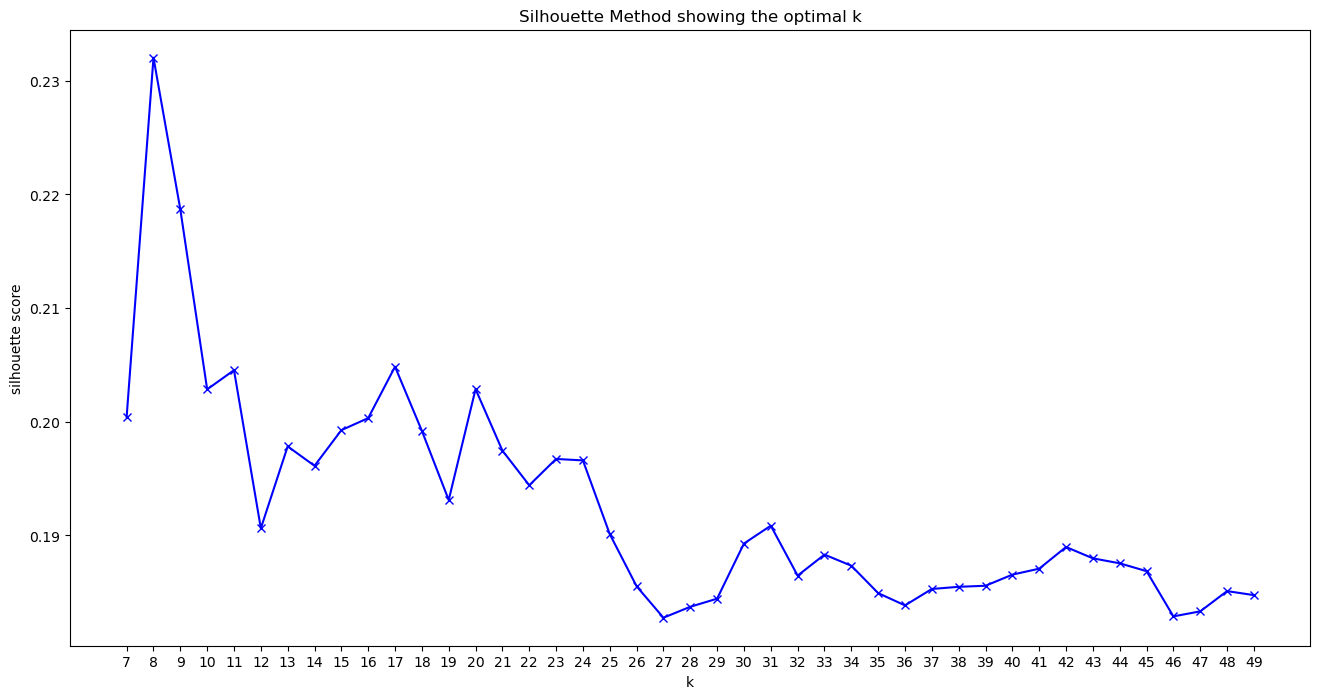

In [15]:
K = range(7,50)
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    init="k-means++",
                    n_init = "auto",
                    max_iter= 50,
                    algorithm="elkan",
                    random_state=1234)
    
    kmeans.fit(X_pca)
    
    silhouette.append(silhouette_score(X_pca, kmeans.predict(X_pca)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

## Kmeans model

In [17]:
kmeans = KMeans(n_clusters=20,
               init="k-means++",
               n_init = "auto",
               max_iter= 100,
               algorithm="elkan",
               random_state=1234)
kmeans.fit(X_pca)
print(kmeans.inertia_)

37987.862816079694


In [18]:
silhouette_score(X_pca, kmeans.predict(X_pca))

0.20299666007632045

### Cluster info

In [19]:
labels = kmeans.labels_
labels

array([ 2, 17, 10, ...,  0,  2, 10], dtype=int32)

In [20]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

In [21]:
clusters = kmeans.predict(X_pca)
pd.Series(clusters).value_counts().sort_index()

0     1971
1      849
2      898
3       54
4     1069
5      506
6      519
7     1266
8     1620
9      555
10    1403
11    1065
12    1019
13     102
14     851
15    1310
16     555
17     462
18    2278
19    1116
Name: count, dtype: int64

## Adding clusters to dataset

In [22]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
song_database_numeric_id_df["cluster"] = clusters
song_database_numeric_id_df

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,cluster
0,6yzJiHzsscf0n88xb9aNT4,0.382,0.451,-6.606,0.0293,0.5570,0.000034,0.506,150.803,4,2
1,5zdXRoKLZ54VBdbdn7yhz4,0.742,0.375,-13.829,0.0482,0.3970,0.901000,0.105,102.023,4,17
2,5qvCKAyjgHnpR5c63OedCY,0.585,0.552,-10.613,0.0353,0.1940,0.017100,0.496,100.089,4,10
3,2vByA9JgfMU2bPjUqmxCdv,0.405,0.535,-7.504,0.0531,0.0531,0.106000,0.637,97.698,4,19
4,0pPQwIjwqduvLfZORYYEaI,0.586,0.526,-6.928,0.0564,0.5550,0.000000,0.456,107.153,4,7
...,...,...,...,...,...,...,...,...,...,...,...
19463,6RWCvgNCEqXuVZYnDTPDEh,0.431,0.628,-6.259,0.0384,0.4030,0.000008,0.277,118.016,4,19
19464,4oEf84vBYVftf6KmZexhVo,0.486,0.640,-8.027,0.0551,0.1360,0.000076,0.289,122.017,4,19
19465,0lbHiQaHPlp5gGtsUPtj6l,0.606,0.757,-6.206,0.0302,0.0157,0.000205,0.588,103.051,4,0
19466,4kjI1gwQZRKNDkw1nI475M,0.455,0.621,-7.694,0.0517,0.6510,0.000003,0.280,119.043,4,2


### Testing clusters by ear

In [23]:
from IPython.display import IFrame

def play_song(track_id):
    iframe = IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
    display(iframe)

In [36]:
#find songs in same cluster
track = song_database_numeric_id_df[song_database_numeric_id_df["cluster"] == 11].sample()
track_id = track["id"].item()
play_song(track_id)

## Exporting models,scalers and dataframes

### Model and scaler

In [ ]:
import pickle

def save(model, filename = "filename.pickle"):
    with open(filename, "wb") as f:
        pickle.dump(model, f)

In [ ]:
with open("model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

### Dataset


In [ ]:
song_database_numeric_id_df.to_csv("../data/audio_features_db_df.csv")